## Clustering

### Centroid-based clustering (K-means)

In [1]:
import numpy as np
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [2]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [3]:
import matplotlib.pyplot as plt

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

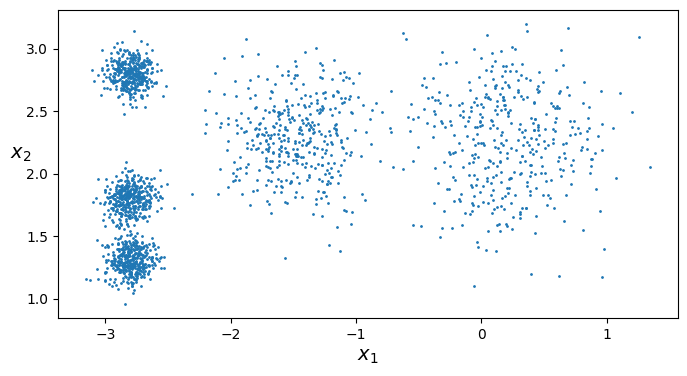

In [4]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

In [5]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [6]:
y_pred

array([2, 2, 4, ..., 1, 4, 2], dtype=int32)

In [7]:
kmeans.cluster_centers_

array([[-0.066884  ,  2.10378803],
       [-2.79290307,  2.79641063],
       [-2.80214068,  1.55162671],
       [-1.47468607,  2.28399066],
       [ 0.47042841,  2.41380533]])

In [8]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([0, 4, 1, 1], dtype=int32)

In [9]:
kmeans.transform(X_new)

array([[0.12347236, 2.9042344 , 2.83778629, 1.50178217, 0.62652832],
       [3.06863967, 5.84739223, 5.81943941, 4.48368889, 2.56319474],
       [3.06697984, 0.29040966, 1.4618254 , 1.685008  , 3.51958769],
       [2.95975563, 0.36159148, 0.96879317, 1.54053323, 3.47149865]])

#### Initialization methods for K-means

In [10]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)

In [11]:
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1)

In [12]:
kmeans.inertia_

211.5985372581684

In [13]:
kmeans.score(X)

-211.5985372581684

#### Accelerated K-means and mini-batch K-means

In [14]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5)

In [15]:
minibatch_kmeans.inertia_

220.10195100224493

### Search for the optimal number of clusters

In [16]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

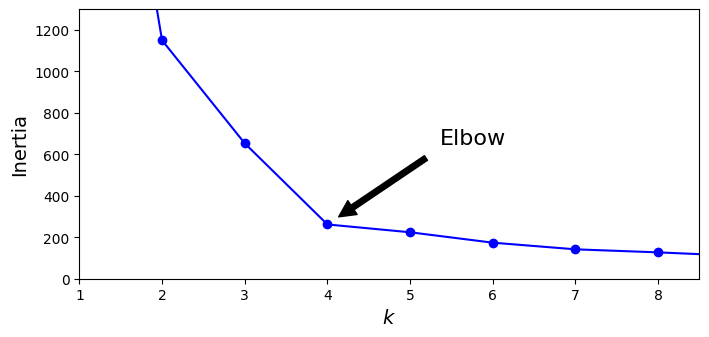

In [17]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

In [18]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

np.float64(0.655517642572828)

In [19]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

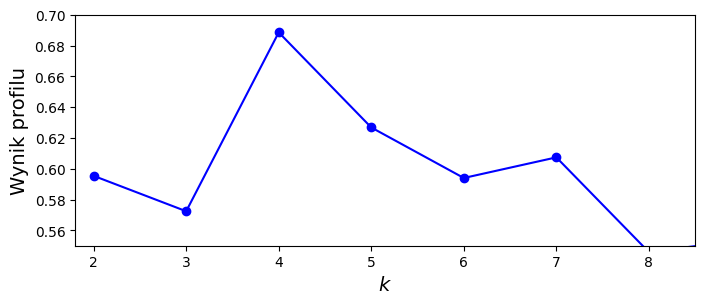

In [20]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Wynik profilu", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

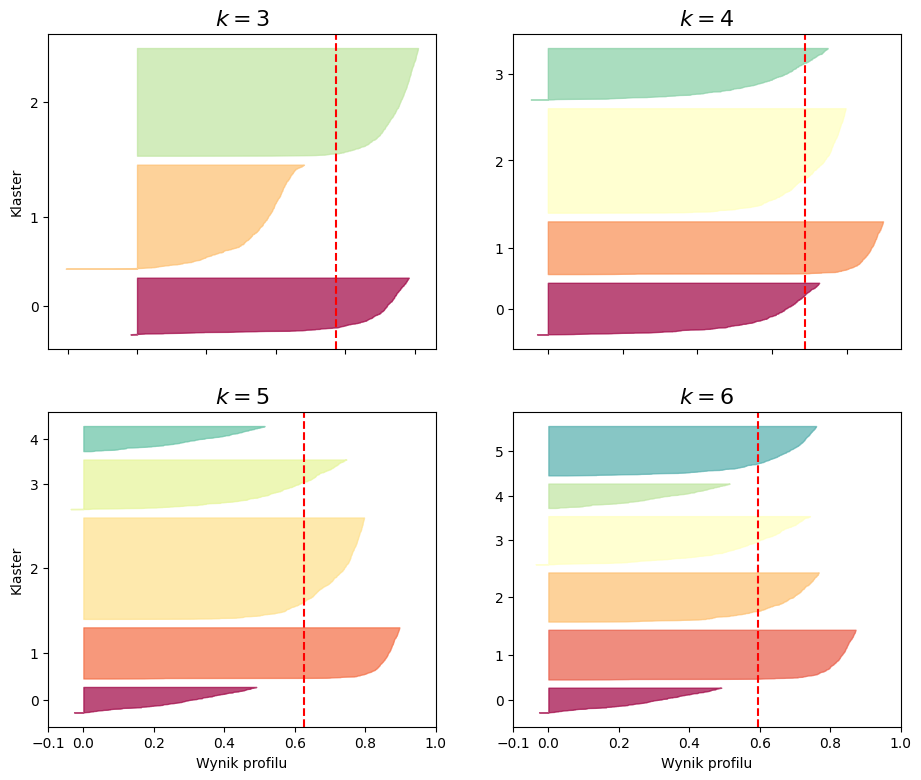

In [21]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Klaster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Wynik profilu")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)
    
plt.show()

### Image segmentation

In [22]:
from matplotlib.image import imread
image = imread("ladybug.png")
image.shape

(533, 800, 3)

In [23]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [24]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))


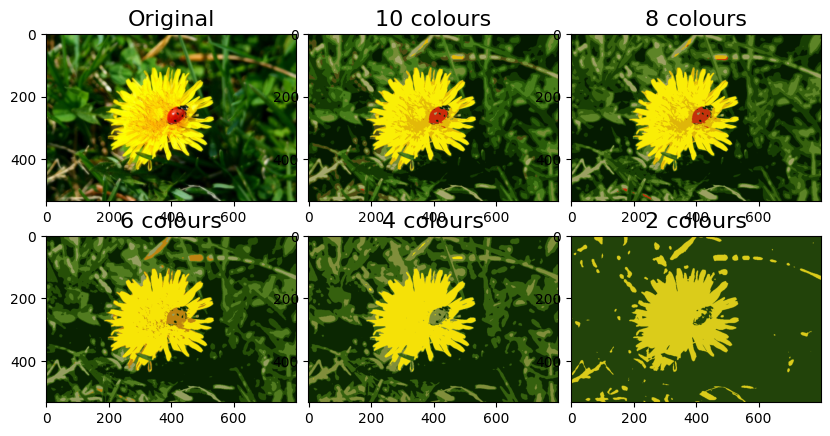

In [25]:
plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original", fontsize=16)

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colours".format(n_clusters), fontsize=16)
    
plt.show()

### Using clustering for preprocessing

In [26]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

In [27]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=10000, random_state=42)
log_reg.fit(X_train, y_train)

C:\Users\Grzegorz\Desktop\um\unsupervised_learning\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=10000, multi_class='ovr', random_state=42)

In [28]:
log_reg.score(X_test, y_test)

0.9688888888888889

In [29]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=10000, random_state=42))
])
pipeline.fit(X_train, y_train)

C:\Users\Grzegorz\Desktop\um\unsupervised_learning\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=42)),
                ('log_reg',
                 LogisticRegression(max_iter=10000, multi_class='ovr',
                                    random_state=42))])

In [30]:
pipeline.score(X_test, y_test)

0.98

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=0)
grid_clf.fit(X_train, y_train)

C:\Users\Grzegorz\Desktop\um\unsupervised_learning\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Grzegorz\Desktop\um\unsupervised_learning\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Grzegorz\Desktop\um\unsupervised_learning\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Grze

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, random_state=42)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=10000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': range(2, 100)})

In [34]:
grid_clf.best_params_

{'kmeans__n_clusters': 79}

### Clustering for semi-supervised learning

In [35]:
n_labeled = 50
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=10000, random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

C:\Users\Grzegorz\Desktop\um\unsupervised_learning\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


0.8333333333333334

In [36]:
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

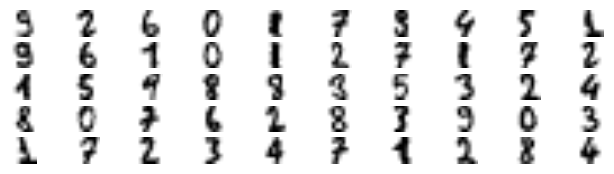

In [37]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')
    
plt.show()

In [38]:
y_representative_digits = np.array([
    9, 2, 6, 0, 8, 7, 8, 4, 5, 1,
    9, 6, 1, 0, 1, 2, 7, 1, 7, 2,
    1, 5, 9, 8, 8, 3, 5, 3, 2, 4,
    8, 0, 7, 6, 2, 8, 3, 9, 0, 3,
    2, 7, 2, 3, 4, 7, 1, 2, 8, 4])

In [39]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=10000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

C:\Users\Grzegorz\Desktop\um\unsupervised_learning\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


0.9044444444444445

#### Label propagation

In [40]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [41]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=10000, random_state=42)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

C:\Users\Grzegorz\Desktop\um\unsupervised_learning\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


0.9244444444444444

In [42]:
percentile_closest = 60

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1
    
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [43]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=10000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

C:\Users\Grzegorz\Desktop\um\unsupervised_learning\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


0.9288888888888889

### DBSCAN

In [44]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [45]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5])

In [46]:
len(dbscan.core_sample_indices_)

808

In [47]:
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13])

In [48]:
dbscan.components_[:3]

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599]])

In [49]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6])

In [50]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [51]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([6, 0, 3, 2])

In [52]:
knn.predict_proba(X_new)

array([[0.24, 0.  , 0.  , 0.  , 0.  , 0.  , 0.76],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.3 , 0.7 , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ]])

In [53]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  3, -1])

### Gaussian mixtures

In [54]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [55]:
gm.weights_

array([0.58665595, 0.20291052, 0.21043353])

In [56]:
gm.means_

array([[ 0.49067581,  0.2579044 ],
       [-0.74886394,  0.5549146 ],
       [ 1.72666283, -0.07241745]])

In [57]:
gm.covariances_

array([[[ 0.1633683 , -0.09679743],
        [-0.09679743,  0.28719319]],

       [[ 0.05311309,  0.06174985],
        [ 0.06174985,  0.08971553]],

       [[ 0.06282163,  0.06680095],
        [ 0.06680095,  0.08831191]]])

In [58]:
gm.converged_

True

In [59]:
gm.n_iter_

15

In [60]:
gm.predict(X)

array([0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 1, 0, 1, 2,
       1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 2, 0, 2,
       0, 2, 2, 2, 0, 1, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 1, 0, 0, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1,
       0, 0, 2, 0, 1, 0, 1, 0, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 0, 1, 2, 0, 1, 2, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0,
       0, 2, 1, 0, 1, 0, 0, 0, 0, 2, 0, 2, 1, 1, 0, 2, 2, 0, 0, 1, 0, 0,
       1, 2, 2, 1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1, 0, 0,
       1, 1, 0, 2, 2, 0, 0, 1, 1, 1, 2, 1, 0, 0, 0,

In [61]:
gm.predict_proba(X)

array([[1.00000000e+000, 3.64951782e-014, 3.00738850e-079],
       [9.99452341e-001, 1.60299628e-122, 5.47658976e-004],
       [9.99998163e-001, 8.31445845e-110, 1.83673723e-006],
       ...,
       [1.56339547e-002, 5.58529742e-187, 9.84366045e-001],
       [3.23032437e-004, 9.99676968e-001, 4.00806204e-157],
       [1.00000000e+000, 1.83929503e-046, 3.86023192e-038]])

In [62]:
X_new, y_new = gm.sample(6)
X_new

array([[ 0.75311295,  0.83224471],
       [ 0.48802486,  0.10075663],
       [ 0.27201943,  1.18827386],
       [ 0.78027722,  0.10427621],
       [-0.61544416,  0.66843781],
       [-0.67385613,  0.38762816]])

In [63]:
y_new

array([0, 0, 0, 0, 1, 1])

In [64]:
gm.score_samples(X)

array([-1.58493046e+00, -1.85152755e+00, -1.58315650e+00, -1.90369951e+00,
       -2.30657201e-01, -1.35004833e+00, -1.58796894e+00, -1.57793817e+00,
       -3.60832648e-01, -1.79854552e+00, -1.79842049e+00, -1.67554563e+00,
       -1.44635406e+00, -4.85981937e-01, -8.65932133e-01,  9.73264815e-03,
       -2.17833947e+00, -7.22318802e-01, -1.99610252e+00, -9.05574514e-01,
       -1.75480071e+00, -1.76337699e+00, -1.14690944e-01, -1.58731320e+00,
       -1.53324414e+00, -1.74849220e+00, -1.66473461e+00, -1.24215398e+00,
       -3.36756602e-01, -5.62649259e-01, -5.13400485e-01, -1.43757187e+00,
       -1.81779190e+00, -1.99769200e+00,  1.13898739e-02, -1.95671357e+00,
       -1.58206750e+00, -1.27573646e+00, -2.96564395e-01, -1.57837509e+00,
       -1.18811165e+00, -1.66965920e+00, -1.05567046e+00, -1.20620316e+00,
       -1.50183800e+00, -2.10412814e+00, -1.69653555e+00, -1.56653560e+00,
       -3.12996755e-01, -5.49281548e-01, -1.81285858e+00, -9.13057956e-01,
       -1.95307027e+00, -

#### Anomaly detection using Gaussian mixtures

In [65]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

#### Selecting the number of clusters

In [66]:
gm.bic(X)

np.float64(2808.2855871998922)

In [67]:
gm.aic(X)

np.float64(2724.853747457196)

#### Variational Bayesian Gaussian mixtures

In [68]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)

C:\Users\Grzegorz\Desktop\um\unsupervised_learning\.venv\Lib\site-packages\sklearn\mixture\_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

In [69]:
np.round(bgm.weights_, 2)

array([0.07, 0.15, 0.13, 0.12, 0.14, 0.16, 0.  , 0.11, 0.11, 0.  ])